# More Models

[Load data using Kaggle APIs](#section1)

[Train test splilt](#section2)

[KNN](#section3)

[Using subset of data](#section4)

[Random Forest](#section5)

[Gradient Boost](#section6)

[MultinomianlNB](#section7)

[SVM](#section8)

[Meta Learners](#section9)

[Feature Generation](#section10)

[Ensemble Voting](#section11)

[Extreme Gradient Boost](#section12)

[Load model and predict](#section13)

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from mlxtend.classifier import StackingClassifier,EnsembleVoteClassifier
from sklearn.metrics import log_loss,classification_report,confusion_matrix, roc_curve, roc_auc_score,accuracy_score


%matplotlib inline
random_seed = 42
np.random.seed(random_seed)

## Load data using Kaggle APIs

In [0]:
!pip install mlxtend

In [0]:
!pip install kaggle-cli

In [0]:
!kg download -u nehajainsurana -p IL0ve@rsh -c otto-group-product-classification-challenge

In [23]:
!ls

gradient_boost_model  sampleSubmission.csv  test.csv.zip  train.csv.zip
sample_data	      test.csv		    train.csv


In [6]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [7]:
df = pd.read_csv("train.csv")
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [8]:
df.drop("id",axis=1,inplace=True,errors='ignore')
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [9]:
df.target = [ int(clas[-1]) for clas in df.target]
df.target.unique()
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


## Train test splilt

In [10]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1, random_state=42)
print(sss)

X = df.drop("target",axis=1)
y = df.target

train_index = []
test_index = []

for tr, tes in sss.split(X,y):
    print("TRAIN:", tr, "TEST:", tes)
    train_index = tr
    test_index = tes

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print("Shapes of data sets")
print("X_train: ", X_train.shape, "y_train: ", y_train.shape)
print("X_test: ", X_test.shape,"y_test: ", y_test.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.1,
            train_size=None)
('TRAIN:', array([57972, 30244,  9427, ..., 60232, 28576, 27516]), 'TEST:', array([59081, 21681, 51999, ...,  1777,   269, 53901]))
Shapes of data sets
('X_train: ', (55690, 93), 'y_train: ', (55690,))
('X_test: ', (6188, 93), 'y_test: ', (6188,))


In [0]:
# from sklearn import preprocessing

# X_scale_train = preprocessing.scale(X_train)

## KNN

In [0]:
# apply knn and see the distribution of classes in output
knn = KNeighborsClassifier(n_neighbors=10)

In [0]:
gscv = GridSearchCV(estimator=knn,param_grid={"n_neighbors": [3,10,30,100]},cv=3)


In [14]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
knn.fit(X_train,y_train)

In [0]:
y_pred = knn.predict(X_test)

In [44]:
log_loss(y_true=y_test,y_pred=knn.predict_proba(X_test))


1.432255977857557

In [27]:
confusion_matrix(y_test,y_pred)

array([[ 112,    8,    1,    0,    2,    8,    5,   26,   31],
       [   7, 1299,  270,   16,    5,    2,   10,    1,    2],
       [   1,  398,  372,   19,    0,    3,    4,    1,    2],
       [   0,  100,   79,   77,    4,    9,    0,    0,    0],
       [   0,    7,    5,    0,  261,    0,    1,    0,    0],
       [  20,   22,    3,    4,    1, 1307,   21,   24,   12],
       [  17,   29,   38,    2,    1,   14,  167,   14,    2],
       [  22,   10,    3,    0,    0,   21,   12,  760,   18],
       [  22,    7,    3,    1,    1,   15,    2,   17,  428]])

In [29]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.56      0.58      0.57       193
          2       0.69      0.81      0.74      1612
          3       0.48      0.47      0.47       800
          4       0.65      0.29      0.40       269
          5       0.95      0.95      0.95       274
          6       0.95      0.92      0.94      1414
          7       0.75      0.59      0.66       284
          8       0.90      0.90      0.90       846
          9       0.86      0.86      0.86       496

avg / total       0.77      0.77      0.77      6188



## Using subset of data

In [9]:
# let us do grid search on subset of data only
sss2 = StratifiedShuffleSplit(n_splits=1,test_size=0.9, random_state=42)
print(sss2)

train_index = []
test_index = []

for tr, tes in sss2.split(X_train,y_train):
    print("TRAIN:", tr, "TEST:", tes)
    train_index = tr
    test_index = tes
    break

X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]


print("Shapes of data sets")
print("X_train: ", X_train1.shape, "y_train: ", y_train1.shape)
print("X_test: ", X_test1.shape,"y_test: ", y_test1.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.9,
            train_size=None)
('TRAIN:', array([ 7422, 17236, 33894, ..., 14514, 13032, 33986]), 'TEST:', array([16325, 47456, 52996, ...,  8193, 21409, 18322]))
Shapes of data sets
('X_train: ', (5569, 93), 'y_train: ', (5569,))
('X_test: ', (50121, 93), 'y_test: ', (50121,))


In [40]:
gscv.fit(X_train1,y_train1)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
gscv.fit(X_train2,y_train2)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

## Random Forest

In [0]:
rfc = RandomForestClassifier(random_state=42)
params = {"max_depth": [3,5,10], "max_features": [5,10,20], "n_estimators": [500,1000]}
gscv2 = GridSearchCV(estimator=rfc,param_grid=params,cv=3)


In [54]:
gscv2.fit(X_train1,y_train1)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 10, 20], 'n_estimators': [500, 1000], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
gscv2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
gscv2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
rfc = RandomForestClassifier(max_depth=10, max_features=20,n_estimators=500,random_state=42)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
log_loss(y_test,rfc.predict_proba(X_test))

0.9041263681808059

In [0]:
print(classification_report(y_test,rfc.predict(X_test)))

## GradientBoost

In [0]:
gb = GradientBoostingClassifier(random_state=42)
params = {"max_depth": [5,10,50], "max_features": [10,20,50], "n_estimators": [500,1000]}
gscv3 = GridSearchCV(estimator=gb,param_grid=params,cv=3)

In [10]:
gscv3.fit(X_train1,y_train1)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [10, 20, 50], 'n_estimators': [500, 1000], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
gscv3.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [0]:
gb2 = GradientBoostingClassifier(random_state=42, max_depth=5,
              max_features=20, n_estimators=1000)


In [12]:
gb2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [0]:
y_pred = gb2.predict(X_test)

(array([ 154., 1789.,  730.,  183.,    0.,  268., 1430.,  274.,  851.,
         509.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

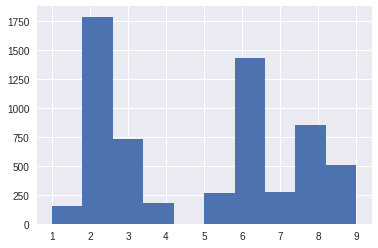

In [14]:
plt.hist(y_pred)

In [15]:
log_loss(y_test, gb2.predict_proba(X_test))

0.49744649762503285

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 116,    4,    0,    0,    0,   18,    6,   18,   31],
       [   1, 1351,  209,   22,    0,    9,   13,    3,    4],
       [   1,  326,  442,   14,    0,    1,   13,    1,    2],
       [   0,   67,   51,  139,    3,    8,    0,    1,    0],
       [   1,    5,    2,    0,  263,    2,    1,    0,    0],
       [   2,   11,    4,    3,    2, 1340,   22,   19,   11],
       [   8,   18,   19,    5,    0,   14,  210,    6,    4],
       [   9,    6,    2,    0,    0,   21,    8,  790,   10],
       [  16,    1,    1,    0,    0,   17,    1,   13,  447]])

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.75      0.60      0.67       193
          2       0.76      0.84      0.79      1612
          3       0.61      0.55      0.58       800
          4       0.76      0.52      0.62       269
          5       0.98      0.96      0.97       274
          6       0.94      0.95      0.94      1414
          7       0.77      0.74      0.75       284
          8       0.93      0.93      0.93       846
          9       0.88      0.90      0.89       496

avg / total       0.82      0.82      0.82      6188



In [20]:
accuracy_score(y_test,y_pred)

0.823852617970265

In [0]:
from sklearn.externals import joblib


In [22]:
# save the model
joblib.dump(gb2, filename="gradient_boost_model")

['gradient_boost_model']

## MultinomianlNB

In [0]:
mnb = MultinomialNB()

In [22]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
log_loss(y_test,mnb.predict_proba(X_test))

3.450091302463738

## SVM

In [0]:
svc = SVC(probability=True)

In [29]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
log_loss(y_test,svc.predict_proba(X_test))

0.5651968407519864

## Meta Learners

In [0]:
feat_1_gb = gb2.predict_proba(X_train)

In [0]:
feat_2_svc = svc.predict_proba(X_train)

In [0]:
X_meta_train = pd.concat([pd.DataFrame(feat_1_gb),pd.DataFrame(feat_2_svc)],axis=1)

In [49]:
X_meta_train.head()

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8
0,4.439761e-03,1.112042e-04,2.382785e-05,3.111815e-06,4.607074e-14,2.706367e-05,1.504268e-05,6.466183e-06,9.953735e-01,9.137233e-02,7.128310e-04,5.478633e-04,7.075260e-04,0.000209,3.912098e-03,0.001205,1.553012e-03,8.997796e-01
1,9.714540e-09,1.102289e-07,7.858907e-09,4.170332e-08,9.999998e-01,2.221387e-09,3.033133e-08,5.735649e-09,1.183788e-08,1.428690e-09,4.238699e-09,8.904438e-10,3.389946e-09,0.999997,1.826665e-08,0.000003,2.943506e-08,2.396427e-07
2,3.530935e-05,9.488228e-01,5.106876e-02,2.258274e-05,1.070194e-11,5.481656e-06,2.182808e-06,1.292028e-05,2.995967e-05,4.512663e-04,8.233249e-01,1.650795e-01,6.878065e-03,0.000954,3.698288e-04,0.002203,3.923130e-04,3.466790e-04
3,7.953619e-04,1.579228e-02,2.106128e-03,4.709531e-03,5.080602e-07,9.301346e-01,1.984440e-03,2.562962e-03,4.191418e-02,4.290061e-03,6.443196e-03,1.392085e-04,2.153763e-03,0.000759,2.682548e-01,0.000315,1.740501e-03,7.159050e-01
4,2.002009e-04,9.253761e-02,8.893313e-01,4.272307e-03,2.397962e-07,4.049978e-04,9.218248e-03,3.793573e-04,3.655698e-03,2.389568e-03,3.573378e-01,5.973758e-01,1.574094e-02,0.004253,9.086599e-04,0.020634,5.575301e-04,8.023803e-04


In [0]:
feat_1_gb_test = gb2.predict_proba(X_test)
feat_2_svc_test = svc.predict_proba(X_test)
X_meta_test = pd.concat([pd.DataFrame(feat_1_gb_test),pd.DataFrame(feat_2_svc_test)],axis=1)

In [51]:
X_meta_test.head()

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8
0,8.447481e-02,1.151424e-02,5.872739e-03,1.697034e-03,2.744064e-07,3.118215e-01,1.257570e-02,3.915925e-02,5.328844e-01,0.017874,0.007305,0.036993,0.001051,0.000262,0.016915,0.013286,0.144194,0.762120
1,2.032773e-05,4.673387e-01,4.807415e-01,5.140058e-02,1.411128e-08,7.483281e-05,2.952040e-04,1.052145e-04,2.364862e-05,0.000053,0.550869,0.427900,0.020983,0.000058,0.000028,0.000085,0.000014,0.000008
2,7.205582e-07,3.002350e-06,6.654588e-06,2.291648e-07,5.584673e-15,2.246140e-06,7.426911e-05,9.999128e-01,1.090683e-07,0.003131,0.001543,0.001131,0.000464,0.000125,0.003474,0.003623,0.983028,0.003481
3,8.470589e-09,1.668876e-08,3.575327e-09,3.110255e-09,9.999999e-01,1.037122e-09,1.488738e-08,3.424354e-09,5.726237e-09,0.000151,0.000262,0.000062,0.001056,0.997004,0.000243,0.000577,0.000319,0.000326
4,2.336165e-03,4.879896e-04,1.540843e-03,8.825508e-05,7.388433e-14,4.038001e-04,2.909409e-03,9.919905e-01,2.430867e-04,0.039224,0.005609,0.005693,0.002518,0.000503,0.038706,0.154208,0.742639,0.010900


In [55]:
lr = LogisticRegression()
lr.fit(X_meta_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
log_loss(y_test,lr.predict_proba(X_meta_test))

0.679973323403471

In [0]:
mnb_meta = MultinomialNB()

In [58]:
mnb_meta.fit(X_meta_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
log_loss(y_test,mnb_meta.predict_proba(X_meta_test))

0.5890134467396764

## Feature Generation

In [0]:
sum = [row.values.sum() for ix,row in X_train.iterrows()]

In [82]:
X_train.drop("num_zeros",axis=1,inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
max_val = [row.values.max() for ix,row in X_train.iterrows()]

In [0]:
num_zeros = [(row.values==0).sum() for ix,row in X_train.iterrows()]

In [85]:
for ix,row in X_train.iterrows():
  print(row.values.max())
  break

13


In [0]:
max_val

In [0]:
X_train["sum"] = sum
X_train["max_val"] = max_val
X_train["num_zeros"] = num_zeros

In [91]:
X_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,sum,max_val,num_zeros
57972,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,0,0,55,13,75
30244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,9,6,90
9427,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,0,1,0,77,16,68
35950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,17,2,81
18635,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,29,6,77


In [0]:
mnb_new_features = MultinomialNB()

In [96]:
mnb_new_features.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
sum = [row.values.sum() for ix,row in X_test.iterrows()]
max_val = [row.values.max() for ix,row in X_test.iterrows()]
num_zeros = [(row.values==0).sum() for ix,row in X_test.iterrows()]
X_test["sum"] = sum
X_test["max_val"] = max_val
X_test["num_zeros"] = num_zeros

In [97]:
log_loss(y_test,mnb_new_features.predict_proba(X_test))

4.929673235631725

## Extreme Gradient Boost

In [0]:
xgb = XGBClassifier()

In [13]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
log_loss(y_test, xgb.predict_proba(X_test))

0.6497349118162639

## Ensemble Voting

In [0]:
rf = RandomForestClassifier(random_state=42)

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
log_loss(y_test, rf.predict_proba(X_test))

1.4063326452573581

In [0]:
eclf = EnsembleVoteClassifier(clfs=[xgb, rf, gb2,svc], weights=[1,1,2,2], refit=False)

eclf.fit(X_test, y_test)

In [32]:
log_loss(y_test,eclf.predict_proba(X_test))

0.4900051129515107

In [0]:
a = np.zeros((6188,9))

In [69]:
a[:,1] = 1
a

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [70]:
log_loss(y_test, a)

25.54128002312724

In [0]:
y_dummy = np.zeros((6188,1))
y_dummy[:,0] = 2

In [63]:
accuracy_score(y_test,y_dummy[:,0] )

0.2605042016806723

In [67]:
accuracy_score(y_test,y_test)

1.0

In [11]:
#simple LR
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
log_loss(y_test,lr.predict_proba(X_test))

0.6694205634509174

(array([  78., 2339.,  409.,   59.,    0.,  271., 1420.,  220.,  883.,
         509.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

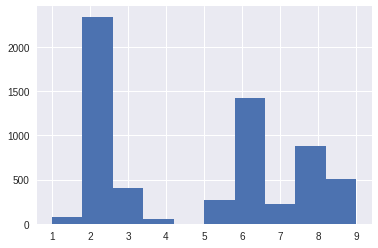

In [14]:
plt.hist(lr.predict(X_test))

(array([ 193., 1612.,  800.,  269.,    0.,  274., 1414.,  284.,  846.,
         496.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

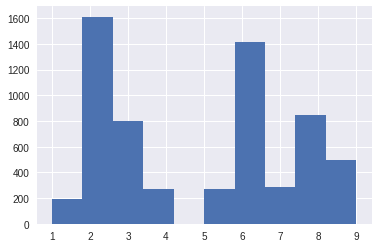

In [15]:
plt.hist(y_test)

## Load model and predict

In [0]:
# load the model
gb_model = joblib.load("gradient_boost_model")

In [38]:
# get the data for which to do the predictions 
# for e.g. here we take 10 rows from our test data set
data = X_test.iloc[100:110,:]
print(data)

       feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
17894       0       0       0       0       0       0       0       0       0   
34701       0       0       0       0       0       0       0       0       0   
36964       0       0       7      11       0       0       0       0       0   
25140       0       0       0       0       0       0       1       0       2   
25931       0       0       0       0       0       0       0       0       0   
21625       0       0       0       0       1       0       0       0       0   
54931       0       0       0       0       0       0       0       0       0   
24145       0       0       0       0       0       0       0       0       0   
12502       0       0       0       0       0       0       0       0       0   
34371       0       0      17       5       0       0       0       0       0   

       feat_10   ...     feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  \
17894        0   ...       

In [0]:
# use the model to do the predictions
predictions = list(gb_model.predict(X_test.iloc[100:110,:]))

In [40]:
print(predictions)

[2, 6, 6, 3, 3, 2, 8, 2, 2, 6]
